# Data Analysis Of Clinical Trials

## Introduction to the Task
<br>
In this task, we are tasked with analyzing clinical trial data to provide insights into the pharmaceutical market in the United States. The dataset provided, Clinicaltrial_16012025.csv, contains over 500,000 rows, representing individual clinical trials. Each row includes various columns with information such as trial names, study types, study statuses, funding sources, conditions, and dates of trials. Using Spark SQL, we will answer several key questions regarding the clinical trial data.

The goal is to extract meaningful insights from the dataset and assist in understanding trends and patterns that can inform future decisions in the pharmaceutical industry. This analysis will cover the following questions:

1. Clinical trial types and their frequency.

2. Top 10 conditions in clinical trials and their frequency.

3. Mean clinical trial length in months.

4. Trends in completed clinical trials related to diabetes over time.

## Data Import and Preprocessing
<br>
Firstly we have loaded the dataset given to us in the form of a csv file into a dataframe with the help of Spark.read.csv() and stored it in a variable for future refrences.After creating the dataframe from the csv i have created a view called clinical_trials for queryiing on the data, and the major preprocessing steps are perfrom whilst querying the data and not initially. 

In [0]:
%python
Clinicaltrial_160_dataframe = spark.read.csv(
"/FileStore/tables/Clinicaltrial_16012025.csv",
header=True, # Use the first row as the header
inferSchema=True, # Infer data types
quote='"', # Define the quote character
escape='"', # Escape quotes inside quoted fields
multiLine=True # Enable multiline support
)
top_10_df = Clinicaltrial_160_dataframe.limit(10)
display(Clinicaltrial_160_dataframe)



NCT Number Study Title Acronym Study Status Conditions Interventions Sponsor Collaborators Enrollment Funder Type Study Type Study Design Start Date Completion Date NCT05013879 Kinesiotape for Edema After Bilateral Total Knee Arthroplasty null COMPLETED Arthroplasty Complications|Arthroplasty, Replacement, Knee DEVICE: Kinesio(R)Tape for edema control Montefiore Medical Center Burke Rehabilitation Hospital 65 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT 2021-10-18T00:00:00.000+0000 2023-11-24T00:00:00.000+0000 NCT00517179 Effect of Vardenafil on Blood Pressure in Patients With Erectile Dysfunction Who Received Concomitant Doxazosin GITS null COMPLETED Prostatic Hyperplasia|Impotence DRUG: Vardenafil 10mg Hospital Authority, Hong Kong null 40 OTHER_GOV INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: DOUBLE|Primary Purpose: TREATMENT 2006-04-01T00:00:00.000+0000 2007-05-01T00:00:00.000+0000 NCT06714279 Laparoscopic-Assisted Transversus Abdominus Plane Block Versus Intraperitoneal Irrigation of Local Anesthetic for Patients Undergoing Laparoscopic Cholecystectomy null NOT_YET_RECRUITING Laparoscopic Cholecystectomy|TAP Block|Local Anesthetic DRUG: Tap Block - Bupivacaine|DRUG: Intraperitoneal infiltration to liver Royal College of Surgeons, Ireland null 144 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT 2025-01-01T00:00:00.000+0000 2025-01-01T00:00:00.000+0000 NCT05600179 OCTA in Epivascular Glia After Dex Implant null COMPLETED Diabetic Retinopathy DRUG: Dexamethasone intravitreal implant Federico II University null 38 OTHER OBSERVATIONAL Observational Model: |Time Perspective: p 2021-01-01T00:00:00.000+0000 2022-09-30T00:00:00.000+0000 NCT01511679 Brain-imaging and Adolescent Neuroscience Consortium BANC WITHDRAWN Alcohol Abuse null Boston Children's Hospital Massachusetts General Hospital|Mclean Hospital|Massachusetts Institute of Technology 0 OTHER OBSERVATIONAL Observational Model: |Time Perspective: p 2012-09-01T00:00:00.000+0000 2017-09-01T00:00:00.000+0000 NCT05602779 Leverage Noninvasive Transcutaneous Vagus Nerve Stimulation to Reduce Suicidal Behaviors in Vulnerable Adolescents null RECRUITING Self Harm|Suicidal Ideation DEVICE: tVns Program|OTHER: Phone App Program|COMBINATION_PRODUCT: tVNS and Phone App Program|OTHER: Enhanced Treatment as Usual University of Notre Dame University of Rochester 212 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION 2023-10-08T00:00:00.000+0000 2027-09-30T00:00:00.000+0000 NCT04175379 The Effect of Permissive Hypercapnia on Oxygenation and Post-operative Pulmonary Complication During One-lung Ventilation null UNKNOWN Thoracic Surgery OTHER: group 40|OTHER: group 50|OTHER: group 60 Yonsei University null 279 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: TRIPLE (PARTICIPANT, CARE_PROVIDER, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT 2019-11-25T00:00:00.000+0000 2021-10-01T00:00:00.000+0000 NCT01126879 Genistein in Treating Patients With Prostate Cancer null TERMINATED Adenocarcinoma of the Prostate|Recurrent Prostate Cancer|Stage I Prostate Cancer|Stage II Prostate Cancer|Stage III Prostate Cancer DIETARY_SUPPLEMENT: genistein|OTHER: placebo|PROCEDURE: therapeutic conventional surgery Northwestern University National Cancer Institute (NCI) 12 OTHER INTERVENTIONAL Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT 2011-02-03T00:00:00.000+0000 2013-12-28T00:00:00.000+0000 NCT03058679 Trial of Specific Carbohydrate and Mediterranean Diets to Induce Remission of Crohn's Disease DINE-CD COMPLETED Crohn Disease OTHER: Diet University of Pennsylvania Patient-Centered Outcomes Research Institute|Crohn's and Colitis Foundation|University of Nor

## Developing a View For Querying: 
Here we are making our DataFrame (Clinicaltrial_160_dataframe) available for SQL queries by registering it as a temporary view named clinical_trials. Once registered, you can use standard SQL syntax (for example, SELECT * FROM clinical_trials WHERE status = 'Completed') to query and manipulate the data directly, blending the flexibility of DataFrame operations with the familiarity of SQL.

In [0]:
%python
# Register the DataFrame as a temporary SQL table
Clinicaltrial_160_dataframe.createOrReplaceTempView("clinical_trials")


## Question : 01
List all the clinical trial types (as contained in the Type column of the data) along
with their frequency, sorting the results from most to least frequent

`SELECT Study Type, COUNT(*) AS Frequency`: We select the Study Type column, which contains the trial type, and use COUNT(*) to calculate how many times each trial type appears in the dataset.

`FROM clinical_trials`: This clause specifies the table from which we are querying the data.

`GROUP BY Study Type`: This groups the rows by the distinct trial types, allowing us to count the frequency of each type.

`ORDER BY Frequency DESC`: The results are sorted by frequency in descending order, meaning the most common study types will appear at the top.
<br>
**Outcome**
<br>
The result of this query will display a list of clinical trial types with their respective frequencies. This allows us to identify which types of trials are most common in the dataset. For example, it might reveal that randomized controlled trials (RCTs) are the most frequent, followed by observational studies.



In [0]:
-- Select study types and their frequency from the clinical_trials table

SELECT `Study Type`,                          -- The type of study (e.g., Interventional, Observational)
  COUNT(*) AS Frequency                  -- Count of records for each study type
FROM clinical_trials
WHERE `Study Type` IS NOT NULL              -- Exclude rows where Study Type is NULL
GROUP BY `Study Type`                          -- Group records by Study Type
ORDER BY Frequency DESC;                       -- Sort the results by frequency in descending order


Study Type Frequency INTERVENTIONAL 399888 OBSERVATIONAL 120906 EXPANDED_ACCESS 966

# Question : 02
The top 10 conditions along with their frequency (note, that the Condition column
can contain multiple conditions in each row, so you will need to separate these
out and count each occurrence separately)

`regexp_replace`: This function is used to standardize the delimiters in the Conditions column by replacing |, ,, ;, and / with a comma.

`split(..., ',')`: After replacing the delimiters, we split the string into an array of conditions.

`explode()`: The explode() function transforms the array into individual rows for each condition, making it possible to count occurrences.

`TRIM(condition)`: We use TRIM() to remove any leading or trailing spaces from the condition values.

`GROUP BY`: This groups the rows by each unique condition, and COUNT(*) counts the frequency of each condition.

`LIMIT 10`: We restrict the output to the top 10 most frequent conditions.

### Outcome

The output will show the top 10 most common conditions associated with clinical trials. This can help identify the diseases or health conditions that are most frequently investigated in clinical research, offering insights into the pharmaceutical landscape.

In [0]:
-- Return the top 10 most frequently occurring medical conditions
-- from the 'Conditions' field in the clinical_trials table.
SELECT 
    trimmed_condition AS conditions,     -- Final cleaned condition name
    COUNT(*) AS Frequency                -- Count of how many times the condition appears
FROM (
    SELECT 
        TRIM(cond) AS trimmed_condition  -- Trim whitespace from each individual condition
    FROM (
        SELECT 
            explode(split(Conditions, '\\|')) AS cond  -- Split multi-condition strings into individual values using '|' as delimiter
        FROM 
            clinical_trials
        WHERE 
            Conditions IS NOT NULL       -- Ensure only non-null 'Conditions' are processed
    ) AS exploded_sub                    -- Subquery to create a row per individual condition
) AS trimmed_sub                         -- Subquery to clean up individual condition names
GROUP BY 
    trimmed_condition                    -- Group by unique cleaned condition
ORDER BY 
    Frequency DESC                       -- Sort in descending order of frequency
LIMIT 10;                                -- Show only the top 10 most common conditions


conditions Frequency Healthy 10309 Breast Cancer 7941 Obesity 6954 Stroke 4484 Hypertension 4256 Depression 4196 Prostate Cancer 4071 Pain 4057 HIV Infections 3819 Cancer 3529

# Question: 03: 
For studies with an end date, calculate the mean clinical trial length in months. 


The `TIMESTAMPDIFF(MONTH, Start Date, Completion Date)` function calculates the difference in months between the Start Date and Completion Date for each trial.

The `AVG()` function then computes the mean duration across all trials where both dates are present.

The `WHERE`  clause ensures data quality by including only those records with non-null Start Date and Completion Date, thus eliminating incomplete entries that could skew the results.

In [0]:
-- Calculate the average trial duration (in months) 
-- between the 'Start Date' and 'Completion Date' 
-- for clinical trials where both dates are available.

SELECT 
    AVG(TIMESTAMPDIFF(MONTH, `Start Date`, `Completion Date`)) AS MeanTrialLengthInMonths  -- Calculate the difference in months between 'Start Date' and 'Completion Date', then find the average.
FROM 
    `clinical_trials`
WHERE 
    `Completion Date` IS NOT NULL      -- Exclude records where 'Completion Date' is NULL
    AND `Start Date` IS NOT NULL;      -- Exclude records where 'Start Date' is NULL


MeanTrialLengthInMonths 35.28130624788374

# Question : 04
From the studies with a non-null completion date and a status of ‘Completed’ in
the Study Status, calculate how many of these related to Diabetes each year.
Display the trend over time in an appropriate visualisation. (For this you can
assume all relevant studies will contain an exact match for ‘Diabetes’ or ‘diabetes’
in the Conditions column.)

`YEAR(Completion Date)`: We extract the year from the Completion Date to group the results by year.

`LOWER(Conditions) LIKE '%diabetes%'`: We use the LOWER() function to ensure case-insensitive matching for "diabetes" in the Conditions column.

`GROUP BY YEAR(Completion Date)`: This groups the data by year, allowing us to count the number of diabetes-related studies each year.

`COUNT(*)`: The count represents the number of diabetes-related studies per year.

Outcome:
The output will show a trend of how the number of diabetes-related clinical trials has changed over the years. This can be visualized using a time series graph, which would help in understanding whether the focus on diabetes in clinical trials is increasing or decreasing over time.

In [0]:
-- First, we create a Common Table Expression (CTE) called 'diabetes_studies'
-- This CTE filters and selects completed clinical trials where the 'Conditions' column contains 'diabetes'.
WITH diabetes_studies AS (
    SELECT 
        YEAR(`Completion Date`) AS Year    -- Extract the year from the 'Completion Date'
    FROM 
        `clinical_trials`
    WHERE 
        `Study Status` = 'COMPLETED'        -- Filter for completed studies only
        AND `Completion Date` IS NOT NULL   -- Ensure there is a valid 'Completion Date'
        AND LOWER(REGEXP_REPLACE(`Conditions`, '[|,;/]', ',')) LIKE '%diabetes%'  -- Normalize the 'Conditions' field by replacing special characters with commas and check if 'diabetes' is mentioned
)

-- Now, we use the CTE to count the number of diabetes-related studies per year
SELECT 
    Year,                                   -- Select the 'Year' from the CTE
    COUNT(*) AS DiabetesStudyCount          -- Count the number of studies for each year
FROM 
    diabetes_studies                        -- Use the 'diabetes_studies' CTE for the query
GROUP BY 
    Year                                    -- Group the results by 'Year'
ORDER BY 
    Year ASC;                               -- Order the results by year in ascending order


Year DiabetesStudyCount 1989 2 1990 1 1991 1 1992 3 1993 3 1994 2 1995 2 1996 2 1997 3 1998 10 1999 11 2000 20 2001 26 2002 51 2003 76 2004 124 2005 190 2006 244 2007 316 2008 416 2009 460 2010 531 2011 514 2012 589 2013 583 2014 595 2015 665 2016 634 2017 717 2018 685 2019 755 2020 559 2021 577 2022 654 2023 618 2024 427 2025 1

###  Exploratory Data Analysis: Diabetes-Related Clinical Trial Trends

This analysis focuses on understanding the **yearly trend** of diabetes-related clinical trials that have been marked as **COMPLETED**. The goal is to identify temporal patterns in **diabetes research efforts** across the years using **Spark SQL** and **Matplotlib**.

---

###  The Approach

- Filtered the dataset to include only trials:
  - Where `Study Status` = **'COMPLETED'**
  - Where `Completion Date` is **not null**
  - Where the `Conditions` field contains the word **"diabetes"**, using  
    `LOWER(Conditions) LIKE '%diabetes%'` for case-insensitive matching

- Extracted the **year** from the `Completion Date` using the `YEAR()` function

- Created a **temporary view** of all qualifying trials

- Used a `GROUP BY` clause to **count** the number of diabetes-related trials **completed per year**

- Aggregated result stored as a **Spark DataFrame**, then converted to **Pandas** using `.toPandas()` for plotting

- Plotted the trend using **Matplotlib**, where:
  - **X-axis**: Year  
  - **Y-axis**: Number of diabetes-related trials completed that year

---

###  Key Observations

- The number of **diabetes-related clinical trials** shows **fluctuations** over time, which may reflect:
  - Changes in **funding**
  - Shifts in **research interest**
  - Evolving **public health focus**

- **Peaks** in certain years may suggest:
  - Increased attention due to **public health initiatives**
  - Major **pharmaceutical developments**
  - **Policy changes** related to diabetes

- **Dips** might indicate:
  - Periods of **reduced funding**
  - Changing **research priorities**
  - Possible **data gaps** (e.g., missing `Completion Date`)

---

This analysis helps visualize how focus on diabetes research has evolved over the years.


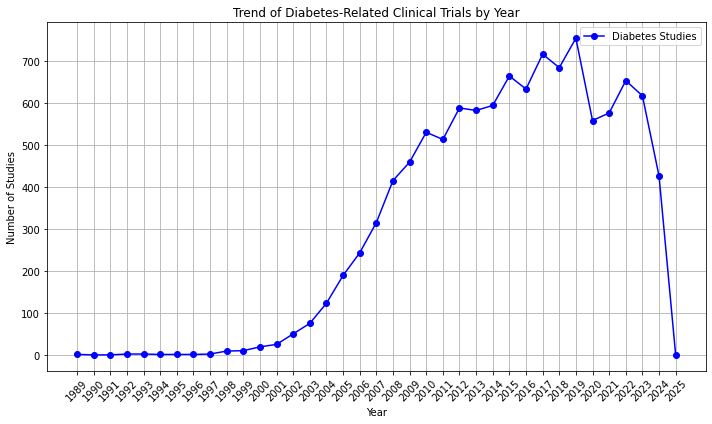

In [0]:
%python
# Assuming you have already run the SQL query and saved the result as a DataFrame:
diabetes_trend_df = spark.sql("""
    WITH diabetes_studies AS (
        SELECT YEAR(`Completion Date`) AS Year
        FROM `clinical_trials`
        WHERE `Study Status` = 'COMPLETED'
        AND `Completion Date` IS NOT NULL
        AND (LOWER(`Conditions`) LIKE '%diabetes%')
    )
    SELECT Year, COUNT(*) AS DiabetesStudyCount
    FROM diabetes_studies
    GROUP BY Year
    ORDER BY Year
""")

# Now let's plot the data using Databricks' display function or matplotlib in Python
import matplotlib.pyplot as plt

# Convert the result to Pandas for easier plotting (assuming you're in a Python notebook)
df = diabetes_trend_df.toPandas()

# Plotting the trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['DiabetesStudyCount'], marker='o', color='b', label='Diabetes Studies')
plt.title('Trend of Diabetes-Related Clinical Trials by Year')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.xticks(df['Year'], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusion:
This analysis of clinical trial data provided valuable insights into key trends and patterns within the pharmaceutical industry. We started by examining the distribution of clinical trial types, ranking them by frequency, which highlighted the most common types of trials. We then explored the top conditions involved in clinical trials, carefully separating and counting each occurrence in the "Conditions" column to understand the prevalence of different health conditions. Additionally, we calculated the average trial duration in months for studies with an end date, providing insight into the typical length of clinical trials. Finally, we analyzed trends in diabetes-related trials, focusing on completed studies and visualizing their frequency over time.

Together, these analyses offer a clearer view of the clinical trial landscape, revealing significant trends in trial types, conditions, and durations, as well as the growing focus on diabetes research. This information is crucial for making data-driven decisions and understanding the shifting priorities within the clinical research and pharmaceutical sectors.